# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:E", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(df.columns)

df=df[df["Base_hours"]==24]
df

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH
0,82.20,0.5470,24,998
1,79.50,0.6550,24,993
2,80.70,0.6210,24,988
3,81.60,0.6280,24,980
4,78.00,0.6310,24,995
...,...,...,...,...
272,60.69,0.6341,24,1100
273,62.30,0.7090,24,1092
274,62.79,0.7565,24,1110
275,55.00,0.8900,24,1128


In [3]:
y=df["Gen_MWH"]
y

0       998
1       993
2       988
3       980
4       995
       ... 
272    1100
273    1092
274    1110
275    1128
276    1133
Name: Gen_MWH, Length: 249, dtype: int64

In [4]:
df=df.drop(columns="Gen_MWH")
df

,Amb_Temp_F,Avg_RH_Pct,Base_hours
0,82.20,0.5470,24
1,79.50,0.6550,24
2,80.70,0.6210,24
3,81.60,0.6280,24
4,78.00,0.6310,24
...,...,...,...
272,60.69,0.6341,24
273,62.30,0.7090,24
274,62.79,0.7565,24
275,55.00,0.8900,24


In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199, 3) (199,)
(50, 3) (50,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

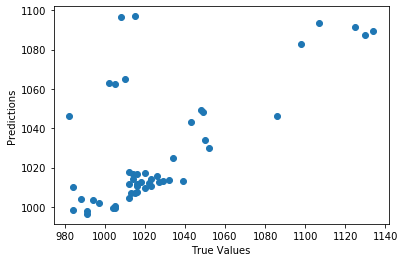

In [7]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
#d=y_test-predictions
y_test.values-predictions

array([  9.39987827,   5.473218  , -57.33178925, -88.71111754,
         4.63861491,   2.86801478,  -5.40225598,  18.3844341 ,
         7.26340758,  -0.73299292, -15.99980339,  25.78362248,
        42.68160109,   5.35313252,  14.94185948,  10.17814085,
        -5.82863079,  16.16438576, -64.46756279,   0.2371288 ,
         5.93662099,  -1.19901918,  -0.1671373 ,  33.27290821,
        15.74289079,  10.13264906, -14.31942618,  13.39269957,
         4.22381301,  22.13413898, -81.9882089 ,   0.79488752,
       -61.17627214,  10.0271066 ,  -6.86630797,  44.51774124,
         8.9483724 , -25.94425028,  -0.10248339, -55.0631476 ,
        -4.92367265,   4.77729468,  12.46817949,  -9.64820067,
        -2.95623288,  39.83153972,  14.54772936,   8.68694553,
         7.88991768,   5.67315525])

In [9]:
df=df.drop(columns="Base_hours")
df

,Amb_Temp_F,Avg_RH_Pct
0,82.20,0.5470
1,79.50,0.6550
2,80.70,0.6210
3,81.60,0.6280
4,78.00,0.6310
...,...,...
272,60.69,0.6341
273,62.30,0.7090
274,62.79,0.7565
275,55.00,0.8900


In [10]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199, 2) (199,)
(50, 2) (50,)


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

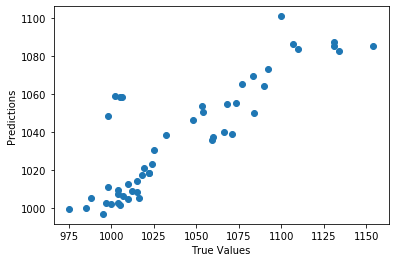

In [12]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
type(predictions)
predictions=predictions.astype(int)
np.dstack((y_test.values,predictions,(y_test.values-predictions)))

array([[[1019, 1021,   -2],
        [ 997, 1002,   -5],
        [1084, 1049,   35],
        [1048, 1046,    2],
        [1010, 1012,   -2],
        [ 988, 1005,  -17],
        [1004, 1009,   -5],
        [1004, 1007,   -3],
        [1032, 1038,   -6],
        [1025, 1030,   -5],
        [ 998, 1048,  -50],
        [1024, 1023,    1],
        [1012, 1009,    3],
        [1090, 1064,   26],
        [1005, 1001,    4],
        [1131, 1085,   46],
        [1006, 1058,  -52],
        [1077, 1065,   12],
        [1083, 1069,   14],
        [1068, 1055,   13],
        [ 975,  999,  -24],
        [1154, 1085,   69],
        [1004, 1002,    2],
        [1018, 1017,    1],
        [1107, 1086,   21],
        [1022, 1018,    4],
        [1053, 1053,    0],
        [1016, 1005,   11],
        [1015, 1008,    7],
        [1002, 1059,  -57],
        [1015, 1014,    1],
        [1110, 1084,   26],
        [1000, 1002,   -2],
        [1060, 1037,   23],
        [1100, 1101,   -1],
        [ 985,  999,

In [14]:
np.average((y_test.values-predictions))

4.78